python_score.csv 파일을 읽어들여서 문제 별 오답율 계산

In [1]:
score = np.loadtxt('python_score.csv', delimiter=',', dtype='float64')

In [2]:
score.shape

(22L, 11L)

정답 열을 색인하여 answer를 생성한다.

In [3]:
answer = score[:, -1]

In [4]:
answer

array([ 3.,  4.,  1.,  1.,  2.,  2.,  1.,  4.,  4.,  2.,  4.,  3.,  3.,
        3.,  2.,  2.,  1.,  2.,  2.,  2., 10., 10.])

In [5]:
answer.shape

(22L,)

객관식 답안 열을 색인하여 dset을 생성한다.

In [6]:
dset = score[:20, :-1]

In [8]:
dset.shape

(20L, 10L)

dset 중 정답은 True 오답인 경우는 False로 표시한 bool_answer를 생성한다.

In [10]:
dset == answer[:20]

c:\python27\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


False

(20,10)인 2차원배열과 (20,)인 1차원 배열 사이 브로드캐스팅 안됨.

In [13]:
bool_answer = (dset.T == answer[:20]).T

객관식 답안을 정답과 비교하여 정답이면 1, 오답이면 0으로 표시한다. 주관식 답안은 점수가 포함된 scoreset을 생성한다.

In [15]:
scoreset = np.where(bool_answer, 1, 0)

In [24]:
scoreset

array([[1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
       [1, 1, 0, 1, 0, 1, 1, 0, 0, 1],
       [1, 0, 1, 0, 1, 1, 1, 1, 0, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 1, 1, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 1, 1, 1, 1, 0, 1, 1, 1],
       [1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 0, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
       [1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 1, 0, 0, 1, 0, 1, 0, 0]])

In [16]:
scoreset.sum(0)

array([20, 16, 16, 16, 16, 19, 18, 19, 13, 17])

In [18]:
scoreset.sum(1)/ 10.0

array([0.9, 0.7, 1. , 0.9, 0.6, 0.7, 1. , 1. , 0.9, 1. , 0.8, 0.9, 1. ,
       0.8, 0.9, 0.8, 0.9, 0.9, 0.9, 0.4])

In [20]:
import matplotlib.pyplot as plt
import numpy as np

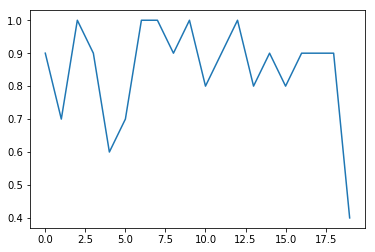

In [23]:
plt.plot(np.arange(20), scoreset.sum(1)/ 10.0)

<BarContainer object of 20 artists>

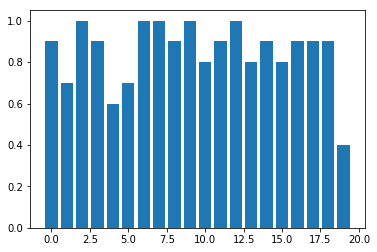

In [31]:
plt.bar(np.arange(20), scoreset.sum(1)/ 10.0)

In [30]:
plt.bar?

개인 별 객관식 배점은 4점이고 주관식은 점수가 기입되어 있다. 그러므로 문제별 배점을 points에 입력 후 np.dot()을 이용하여 개인별 점수를 계산한다.

In [25]:
from numpy import ones

In [26]:
weight = ones(20,) * 4.0

In [27]:
weight

array([4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4.])

In [29]:
scoreset.T.dot(weight)

array([80., 64., 64., 64., 64., 76., 72., 76., 52., 68.])